In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Galxy Sizes Demo

In [2]:
from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog(simname='bolshoi', halo_finder='rockstar', redshift=0, version_name='halotools_v0p4')

In [3]:
from halotools.empirical_models import HodModelFactory

# define the central occupatoion model
from halotools.empirical_models import TrivialPhaseSpace, Cacciato09Cens
cens_occ_model =  Cacciato09Cens(prim_haloprop_key = 'halo_mvir', threshold = 9.0)
cens_prof_model = TrivialPhaseSpace()

# define the satellite occupation model
from halotools.empirical_models import Cacciato09Sats
from halotools.empirical_models import NFWPhaseSpace, SubhaloPhaseSpace
sats_occ_model =  Cacciato09Sats(prim_haloprop_key = 'halo_mvir', threshold = 9.0)
sats_occ_model._suppress_repeated_param_warning = True
sats_prof_model = NFWPhaseSpace()

# convert luminosity to magnitude
from occupation_model_components import MagnitudesSDSS
central_mag_model = MagnitudesSDSS(gal_type='centrals')
satellite_mag_model = MagnitudesSDSS(gal_type='satellites')

# define quenching model
from halotools.empirical_models import ZuMandelbaum16QuenchingCens, ZuMandelbaum16QuenchingSats
cens_quenching_model = ZuMandelbaum16QuenchingCens(prim_haloprop_key = 'halo_mvir')
sats_quenching_model = ZuMandelbaum16QuenchingSats(prim_haloprop_key = 'halo_mvir')

# define morphology model
from morphology_model_components import Morphology_2 as Morphology
cens_morpholopgy_model = Morphology(gal_type='centrals')
sats_morpholopgy_model = Morphology(gal_type='satellites')

# define shape model
from shape_model_components import PS08Shapes, EllipticalGalaxyShapes, DiskGalaxyShapes
cens_elliptical_shape_model = EllipticalGalaxyShapes(gal_type='centrals')
cens_disk_shape_model       = DiskGalaxyShapes(gal_type='centrals')
sats_elliptical_shape_model = EllipticalGalaxyShapes(gal_type='satellites')
sats_disk_shape_model       = DiskGalaxyShapes(gal_type='satellites')

# define alignment model
from intrinsic_alignments.ia_models.ia_model_components import RandomAlignment
central_orientation_model = RandomAlignment(gal_type='centrals')
satellite_orientation_model = RandomAlignment(gal_type='satellites')

# projected shapes
from shape_model_components import ProjectedShapes
central_proj_shapes_model = ProjectedShapes('centrals')
satellite_proj_shapes_model = ProjectedShapes('satellites')

# extinction model
from extinction_model_components import Shao07DustExtinction
central_extinction_model = Shao07DustExtinction(gal_type='centrals')
satellite_extinction_model = Shao07DustExtinction(gal_type='satellites')

# galaxy sizes
from size_model_components import EllipticalGalaxySizes, DiskGalaxySizes
cens_elliptical_size_model = EllipticalGalaxySizes(gal_type='centrals')
cens_disk_size_model       = DiskGalaxySizes(gal_type='centrals')
sats_elliptical_size_model = EllipticalGalaxySizes(gal_type='satellites')
sats_disk_size_model       = DiskGalaxySizes(gal_type='satellites')

# sersic quantities
from sersic_model_components import SersicSize, SersicSurfaceBrightness, SersicIndex 
cens_sersic_index_model = SersicIndex(gal_type='centrals')
sats_sersic_index_model = SersicIndex(gal_type='satellites')
cens_projected_size_index_model = SersicSize(gal_type='centrals')
sats_projected_size_index_model = SersicSize(gal_type='satellites')
cens_sb_model = SersicSurfaceBrightness(gal_type='centrals')
sats_sb_model = SersicSurfaceBrightness(gal_type='satellites')


# combine model components
model_instance = HodModelFactory(centrals_occupation = cens_occ_model,
                                 centrals_profile = cens_prof_model,
                                 centrals_mag_model = central_mag_model,
                                 satellites_mag_model = satellite_mag_model,
                                 satellites_occupation = sats_occ_model,
                                 satellites_profile = sats_prof_model,
                                 centrals_quenching = cens_quenching_model,
                                 satellites_quenching = sats_quenching_model,
                                 centrals_morphology = cens_morpholopgy_model,
                                 satellites_morphology = sats_morpholopgy_model,
                                 centrals_elliptical_galaxy_shape = cens_elliptical_shape_model,
                                 centrals_disk_galaxy_shape = cens_disk_shape_model,
                                 satellites_elliptical_galaxy_shape = sats_elliptical_shape_model,
                                 satellites_disk_galaxy_shape = sats_disk_shape_model,
                                 centrals_orientation = central_orientation_model,
                                 satellites_orientation = satellite_orientation_model,
                                 centrals_proj_shapes = central_proj_shapes_model,
                                 satellites_proj_shapes = satellite_proj_shapes_model,
                                 centrals_extinction_model = central_extinction_model,
                                 satellites_extinction_model = satellite_extinction_model,
                                 centrals_elliptical_size_model = cens_elliptical_size_model,
                                 centrals_disk_size_model = cens_disk_size_model,
                                 satellites_elliptical_size_model = sats_elliptical_size_model,
                                 satellites_disk_size_model  = sats_disk_size_model,
                                 centrals_sersic_index_model = cens_sersic_index_model,
                                 satellites_sersic_index_model = sats_sersic_index_model,
                                 centrals_projected_size_index_model = cens_projected_size_index_model,
                                 satellites_projected_size_index_model = sats_projected_size_index_model,
                                 centrals_sb_model = cens_sb_model,
                                 satellites_sb_model = sats_sb_model,
                                 model_feature_calling_sequence = (
                                 'centrals_occupation',
                                 'centrals_profile',
                                 'satellites_occupation',
                                 'satellites_profile',
                                 'centrals_mag_model',
                                 'satellites_mag_model',
                                 'centrals_quenching',
                                 'satellites_quenching',
                                 'centrals_morphology',
                                 'satellites_morphology',
                                 'centrals_elliptical_galaxy_shape',
                                 'centrals_disk_galaxy_shape',
                                 'satellites_elliptical_galaxy_shape',
                                 'satellites_disk_galaxy_shape',
                                 'centrals_orientation',
                                 'satellites_orientation',
                                 'centrals_proj_shapes',
                                 'satellites_proj_shapes',
                                 'centrals_extinction_model',
                                 'satellites_extinction_model',
                                 'centrals_elliptical_size_model',
                                 'centrals_disk_size_model',
                                 'satellites_elliptical_size_model',
                                 'satellites_disk_size_model',
                                 'centrals_sersic_index_model',
                                 'satellites_sersic_index_model',
                                 'centrals_projected_size_index_model',
                                 'satellites_projected_size_index_model',
                                 'centrals_sb_model',
                                 'satellites_sb_model')
                                )

In [4]:
# populate mock catalog
model_instance.populate_mock(halocat)
mock = model_instance.mock.galaxy_table

N_gal = len(mock)
print("number of galaxies: ", N_gal)

f_sat = 1.0*np.sum(mock['gal_type']=='satellites')/N_gal
print("satellite fraction: ", f_sat)

f_quiescent = 1.0*np.sum(mock['quiescent']==True)/N_gal
print("quiescent fraction: ", f_quiescent)

/Users/duncan/Code/halotools/halotools/empirical_models/phase_space_models/analytic_models/monte_carlo_helpers.py:205: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.rad_prof_func_table_indices[digitized_param_list]
/Users/duncan/Code/halotools/halotools/empirical_models/phase_space_models/analytic_models/monte_carlo_helpers.py:522: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.rad_prof_func_table_indices[digitized_param_list]


number of galaxies:  542090
satellite fraction:  0.271264919109
quiescent fraction:  0.522153148001


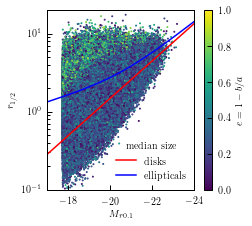

In [20]:
disks = mock['disk']
ellipticals = mock['elliptical']
e = np.array(1 - mock['galaxy_projected_b_to_a'])
mu = mock['galaxy_central_brightness']

m_sample = np.linspace(-16,-24,1000)

plt.figure(figsize=(3.3,3.3))
plt.scatter(mock['Mag_r'][disks], mock['galaxy_r_half'][disks],
            s=1, c=e[disks], vmin=0, vmax=1)
l1, = plt.plot(m_sample, cens_elliptical_size_model.median_size_model(m_sample), '-', color='red')
plt.scatter(mock['Mag_r'][ellipticals], mock['galaxy_r_half'][ellipticals],
            s=1, c=e[ellipticals], vmin=0, vmax=1)
l2, = plt.plot(m_sample, cens_disk_size_model.median_size_model(m_sample), '-', color='blue')
plt.yscale('log')
plt.xlim([-17,-24])
plt.ylim([0.1,20])
plt.xlabel(r'$M_{r0.1}$')
plt.ylabel(r'$r_{1/2}$')
plt.colorbar(label=r'$e=1-b/a$')
plt.legend([l1,l2],['disks','ellipticals'], title='median size',
           loc='lower right', frameon=False, fontsize=10)
plt.show()

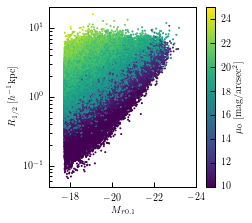

In [23]:
mu0 = mock['galaxy_central_brightness']

plt.figure(figsize=(3.3,3.3))
plt.scatter(mock['Mag_r'], mock['galaxy_projected_re'],
            s=1, c=mu0, vmax=25, vmin=10)
plt.yscale('log')
plt.xlim([-17,-24])
plt.xlabel(r'$M_{r0.1}$')
plt.ylabel(r'$R_{1/2}~[h^{-1}{\rm kpc}]$')
plt.colorbar(label=r"$\mu_0~[{\rm mag/arcsec^2}]$")
plt.ylim([0.05,20])
plt.show()

halo_upid,halo_hostid,conc_NFWmodel,halo_y,halo_x,halo_z,halo_vx,halo_vy,halo_vz,halo_rvir,halo_mvir,halo_id,halo_num_centrals,halo_num_satellites,gal_type,galaxy_b_to_a,galaxy_axisC_y,galaxy_axisC_z,vx,galaxy_central_brightness,host_centric_distance,galaxy_c_to_b,vy,vz,disk,galaxy_projected_re,galaxy_c_to_a,galaxy_mean_brightness,deltaMag_u,deltaMag_i,galaxy_effective_brightness,galaxy_axisC_x,deltaMag_r,elliptical,galaxy_projected_b_to_a,deltaMag_z,galaxy_phi,galaxy_sersic_index,deltaMag_g,quiescent,galaxy_axisA_z,galaxy_axisA_x,galaxy_axisA_y,luminosity,galaxy_axisB_y,galaxy_axisB_x,galaxy_axisB_z,galaxy_r_half,galaxy_theta,Mag_r,y,x,z
int64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,object,float32,float32,float32,float32,float32,float64,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,bool,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32
-1,3060299107,10.0429945,43.2765,35.72499,17.71299,48.16,-34.49,-82.51,1.133583,164300000000000.0,3060299107,1,69,centrals,0.99961704,-0.74157816,0.67013705,48.16,12.367875,0.0,0.68798584,-34.49,-82.51,False,4.034078,0.6877224,19.301706,0.0,0.0,20.694656,0.031275664,0.0,True,0.84248513,0.0,5.5378623,4.0,0.0,True,0.5033922,0.71506524,0.4850546,55891900365.39964,0.46344778,-0.69835776,0.5454472,5.44124,0.8364029,-22.108372,43.2765,35.72499,17.71299
-1,3060312953,5.006244,49.70751,45.20892,39.91124,-14.21,264.96,-132.11,1.120898,158900000000000.0,3060312953,1,69,centrals,0.9536994,0.5602302,0.18373054,-14.21,11.150514,0.0,0.63524604,264.96,-132.11,False,2.320807,0.60583377,18.084345,0.0,0.0,19.477295,0.8077037,0.0,True,0.64124686,0.0,2.5045927,4.0,0.0,True,-0.5846612,0.5479542,-0.5982621,43206145040.285904,0.5729089,-0.21762583,-0.790199,3.1303477,1.386016,-21.828863,49.70751,45.20892,39.91124
-1,3058440575,7.7610803,13.89226,21.81201,9.54759,-4.75,104.38,-61.29,1.004602,114400000000000.0,3058440575,1,44,centrals,0.9986649,0.09570127,-0.62096715,-4.75,12.195988,0.0,0.5750181,104.38,-61.29,False,2.937492,0.5742504,19.12982,0.0,0.0,20.52277,-0.7779724,0.0,True,0.7678206,0.0,5.980887,4.0,0.0,True,0.23335993,-0.3000452,-0.92494106,31642095903.266567,0.3678658,-0.5520252,0.74829334,3.962144,2.2407722,-21.490664,13.89226,21.81201,9.54759
-1,3058441456,3.0182393,14.31423,26.18034,6.51834,-271.94,78.85,423.44,0.95118296,97090000000000.0,3058441456,1,39,centrals,0.9190707,0.5840719,0.792386,-271.94,18.15529,0.0,0.16686238,78.85,423.44,True,4.1500993,0.15335834,19.279753,0.1606905,0.080850564,19.977577,-0.17602405,0.09297815,False,0.85685974,0.06569108,2.9138677,1.0,0.12531838,True,-0.13771915,0.88112456,0.4523858,61391117642.33104,0.6739489,-0.43890208,-0.5942709,5.515482,0.65608585,-22.210264,14.31423,26.18034,6.51834
-1,3058452345,7.915233,29.73324,1.74397,17.82519,317.08,238.52,179.34,0.91088504,85270000000000.0,3058452345,1,30,centrals,0.9466013,0.80561835,-0.50373495,317.08,12.040428,0.0,0.5715632,238.52,179.34,False,2.9630618,0.54104245,18.97426,0.0,0.0,20.36721,0.31181747,0.0,True,0.6706021,0.0,1.3262062,4.0,0.0,True,-0.8381469,-0.40224868,-0.36838257,32450612332.840115,0.46397558,-0.86079377,0.2091908,3.996633,2.0987134,-21.518057,29.73324,1.74397,17.82519
-1,3058463669,6.379982,26.23833,10.27388,22.29268,-57.3,186.67,-187.27,0.907259,84260000000000.0,3058463669,1,36,centrals,0.8736523,-0.16182388,-0.6717693,-57.3,17.435545,0.0,0.19773111,186.67,-187.27,True,3.5099173,0.17274822,18.560007,0.2747199,0.13822384,19.257832,-0.72286856,0.15895742,False,0.7633466,0.11230686,2.8870857,1.0,0.21424696,True,-0.18649995,-0.04637429,0.98135984,75908910421.39508,-0.103662126,0.6894276,-0.7168987,4.66468,2.3073912,-22.440731,26.23833,10.27388,22.29268
-1,3058683023,5.7899995,36.63193,12.02348,33.6698,-306.38,-77.55,-386.58,0.904809,83570000000000.0,3058683023,1,36,centrals,0.89085484,-0.41025352,0.45093718,-306.38